# Fetch top 100 movies

In [1]:
from imdb import IMDb
import time
ia = IMDb()

top_100 = ia.get_popular100_movies()
top_250 = ia.get_top250_movies()

movies = {}
counter = 0
for mov in top_250:
    movies.update({mov.movieID: ia.get_movie(mov.movieID)})
    counter = counter + 1
    print(str(counter) + ". sleep...")
    if counter > 10:
        break
    time.sleep(1)
print("done fetching")
  

1. sleep...
2. sleep...
3. sleep...
4. sleep...
5. sleep...
6. sleep...
7. sleep...
8. sleep...
9. sleep...
10. sleep...
11. sleep...
done fetching


In [2]:
for mov in movies:
    print(movies[mov]['title'])

The Shawshank Redemption
The Godfather
The Godfather: Part II
The Dark Knight
12 Angry Men
Schindler's List
The Lord of the Rings: The Return of the King
Pulp Fiction
The Good, the Bad and the Ugly
The Lord of the Rings: The Fellowship of the Ring
Fight Club


## Extract actors from list

In [3]:
actors = {}


for movie in movies:
    cast = movies[movie]['cast']
    for actor in cast:
        if(actor.personID not in actors):
            actors.update({actor.personID : actor})
            actors[actor.personID]['knownactors'] = {}
        for known in cast:
            if(known.personID != actor.personID):
                actors[actor.personID]['knownactors'].update({known.personID: known['name']})

In [4]:
for actor in actors:
    print(actors[actor]['name'] + " -> " + str(actors[actor]['knownactors']))
print("done")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Create graph

In [5]:
import networkx as nx


actor_network =nx.Graph()
for actor in actors:
    actor_network.add_node(actors[actor]['name'])

for actor in actors:
    knownActors = actors[actor]['knownactors']
    for known in knownActors:
        actor_network.add_edge(actors[actor]['name'], knownActors[known])

In [6]:
min = -1
max = 0
for actor in actors:
    lenght = len(actors[actor]['knownactors'])
    if lenght > max:
        max = lenght
    elif lenght < min or min == -1:
        min = lenght

print("min: ")
print(min)
print("max:")
print(max)

min: 
17
max:
319


67494


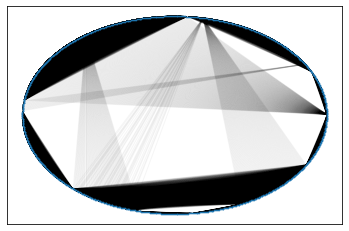

In [16]:
import matplotlib.pyplot as plt
print(len(actor_network.edges))

pos = nx.drawing.layout.circular_layout(actor_network)
#nx.draw_networkx_nodes(actor_network, pos,  node_size=4)
#nx.draw_networkx_edges(actor_network, pos, alpha=0.04)
nx.draw(actor_network, with_labels=True, font_size=0.5, node_size=0.3)
#nx.draw_shell(actor_network, nlist=[range(min, max), range(min)], with_labels=True, font_weight='bold')
plt.savefig("D:\\graph.png",dpi=3000)

### Degree Distribution

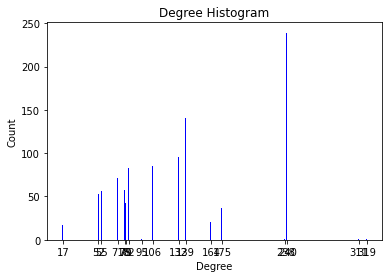

In [12]:
import collections

degree_sequence = sorted([d for n, d in actor_network.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = actor_network.subgraph(sorted(nx.connected_components(actor_network), key=len, reverse=True)[0])
pos = nx.spring_layout(actor_network)
plt.axis("off")

plt.show()

In [30]:
x = sorted(nx.connected_components(actor_network), key=len, reverse=True)
#diameter2 = nx.diameter(actor_network.to_undirected())
diameter = nx.diameter(actor_network.subgraph(x[0]), nx.eccentricity(actor_network.subgraph(x[0])), False)
print(diameter)

## Zusammenhangskomponenten

In [ ]:
print("Anzahl der Zusammenhangskomponenten in g:")
print(nx.number_connected_components(actor_network))
print("Die Komponenten:")
print([c for c in nx.connected_components(actor_network)])